# Datenanalyse Part II

### Es stehen zwei CSV Datensets zur Verfügung:

#### CSV "persons_killed_on_motorways_eu.csv" enthält die Anzahl der getöteten Personen in Autobahnunfällen aller EU Länder
#### CSV "road_accidents_eu.csv" enthält die Anzahl der Verkehrsunfälle aller EU Länder

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm

In [2]:
# Personen, die auf Autobahnen getötet wurden
persons_killed_data = pd.read_csv('data/persons_killed_on_motorways_eu.csv')

# Verkehrsunfälle
accidents_data = pd.read_csv('data/road_accidents_eu.csv')

In [3]:
# Struktur untersuchen

# Erste Zeilen der Daten anzeigen
print(persons_killed_data.head())

# Informationen über die Spalten und den Datentyp
print(persons_killed_data.info())

# Erste Zeilen der Daten anzeigen
print(accidents_data.head())

# Informationen über die Spalten und den Datentyp
print(accidents_data.info())

                    DATAFLOW        LAST UPDATE freq unit tra_infr geo  \
0  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   
1  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   
2  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   
3  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   
4  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2012         50      NaN  
1         2013         31      NaN  
2         2014         36      NaN  
3         2015         41      NaN  
4         2016         34      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATAFLOW     254 non-null    object
 1   LAST UPDATE  254 non-null    object
 2   freq         254 non-null    object
 3   unit         254 no

In [4]:
# Überflüssige Spalten entfernen

persons_killed_data = persons_killed_data.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'tra_infr', 'OBS_FLAG'], axis=1)
accidents_data = accidents_data.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG'], axis=1)

print(persons_killed_data)
print(accidents_data)



    geo  TIME_PERIOD  OBS_VALUE
0    AT         2012         50
1    AT         2013         31
2    AT         2014         36
3    AT         2015         41
4    AT         2016         34
..   ..          ...        ...
249  UK         2014         81
250  UK         2015         93
251  UK         2016         91
252  UK         2017         82
253  UK         2018         99

[254 rows x 3 columns]
    geo  TIME_PERIOD  OBS_VALUE
0    AT         2013      38502
1    AT         2014      37957
2    AT         2015      37960
3    AT         2016      38466
4    AT         2017      37402
..   ..          ...        ...
272  SK         2017       5330
273  SK         2018       5335
274  SK         2019       5105
275  SK         2020       4302
276  SK         2021          0

[277 rows x 3 columns]


In [5]:
# DataFrames zusammenführen
merged_data = pd.merge(persons_killed_data, accidents_data, on=['geo', 'TIME_PERIOD'])

# Ergebnis anzeigen
print(merged_data.head())

  geo  TIME_PERIOD  OBS_VALUE_x  OBS_VALUE_y
0  AT         2013           31        38502
1  AT         2014           36        37957
2  AT         2015           41        37960
3  AT         2016           34        38466
4  AT         2017           45        37402


In [6]:
# Spalten umbenennen
merged_data = merged_data.rename(columns={'OBS_VALUE_x': 'killed_persons', 'OBS_VALUE_y': 'accidents'})

# Ergebnis anzeigen
print(merged_data.head())


  geo  TIME_PERIOD  killed_persons  accidents
0  AT         2013              31      38502
1  AT         2014              36      37957
2  AT         2015              41      37960
3  AT         2016              34      38466
4  AT         2017              45      37402


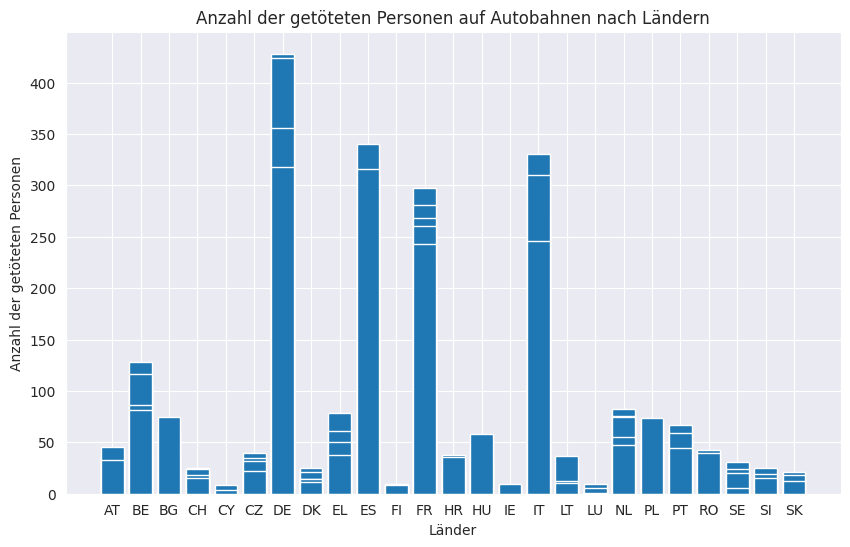

In [8]:
import matplotlib.pyplot as plt

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(merged_data['geo'], merged_data['killed_persons'])

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('Länder')
plt.ylabel('Anzahl der getöteten Personen')
plt.title('Anzahl der getöteten Personen auf Autobahnen nach Ländern')

# Diagramm anzeigen
plt.show()


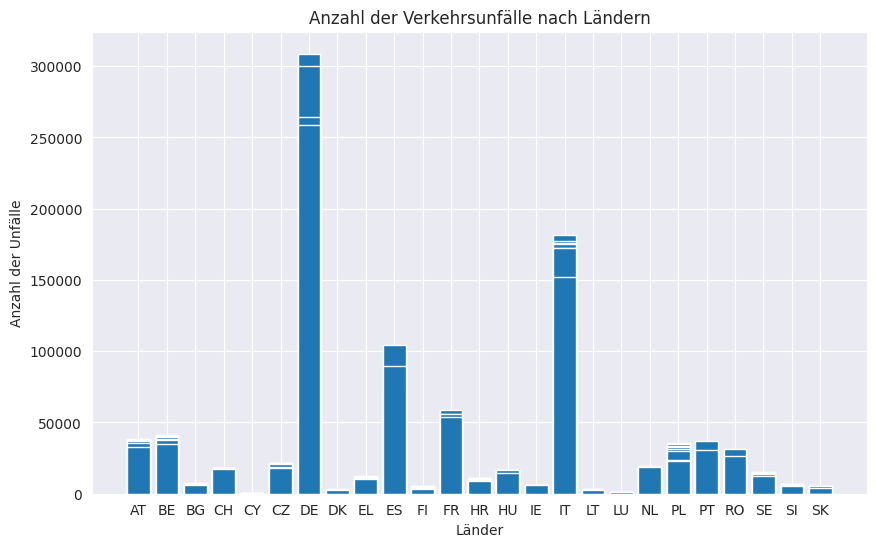

In [16]:
import matplotlib.pyplot as plt

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(merged_data['geo'], merged_data['accidents'])

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('Länder')
plt.ylabel('Anzahl der Unfälle')
plt.title('Anzahl der Verkehrsunfälle nach Ländern')

# Diagramm anzeigen
plt.show()


In [11]:
countries = ['FR', 'CH', 'ES', 'NL', 'PL', 'DE']
selected_countries_data = merged_data[merged_data['geo'].isin(countries)]
print(selected_countries_data)


    geo  TIME_PERIOD  killed_persons  accidents
27   CH         2013              23      17473
28   CH         2014              12      17803
29   CH         2015              21      17736
30   CH         2016              19      17577
31   CH         2017              25      17799
32   CH         2018              19      18033
33   CH         2019              24      17761
34   CH         2020              18      16897
35   CH         2021              15      17436
53   DE         2013             428     291105
54   DE         2014             375     302435
55   DE         2015             414     305659
56   DE         2016             393     308145
57   DE         2017             409     302656
58   DE         2018             424     308721
59   DE         2019             356     300143
60   DE         2020             317     264499
61   DE         2021             318     258987
80   ES         2013             290      89519
81   ES         2014             289    

In [12]:
grouped_data = selected_countries_data.groupby('geo').sum()


In [13]:
grouped_data['accident_rate'] = grouped_data['killed_persons'] / grouped_data['accidents']


In [14]:
germany_accident_rate = grouped_data.loc['DE', 'accident_rate']

comparison_data = grouped_data.loc[['FR', 'CH', 'ES', 'NL', 'PL'], 'accident_rate']
comparison_result = comparison_data < germany_accident_rate

print("Unfallquote in Deutschland:", germany_accident_rate)
print("Unfallquote in den ausgewählten Ländern:")
print(comparison_data)
print("Niedrigere Unfallquote als in Deutschland:")
print(comparison_data[comparison_result])


Unfallquote in Deutschland: 0.00129960073419494
Unfallquote in den ausgewählten Ländern:
geo
FR    0.004557
CH    0.001110
ES    0.003160
NL    0.003963
PL    0.001896
Name: accident_rate, dtype: float64
Niedrigere Unfallquote als in Deutschland:
geo
CH    0.00111
Name: accident_rate, dtype: float64


In [15]:
germany_killed_persons = grouped_data.loc['DE', 'killed_persons']

comparison_data = grouped_data.loc[['FR', 'CH', 'ES', 'NL', 'PL'], 'killed_persons']
comparison_result = comparison_data < germany_killed_persons

print("Anzahl der getöteten Personen in Deutschland:", germany_killed_persons)
print("Anzahl der getöteten Personen in den ausgewählten Ländern:")
print(comparison_data)
print("Niedrigere Anzahl der getöteten Personen als in Deutschland:")
print(comparison_data[comparison_result])


Anzahl der getöteten Personen in Deutschland: 3434
Anzahl der getöteten Personen in den ausgewählten Ländern:
geo
FR    2270
CH     176
ES    2694
NL     605
PL     528
Name: killed_persons, dtype: int64
Niedrigere Anzahl der getöteten Personen als in Deutschland:
geo
FR    2270
CH     176
ES    2694
NL     605
PL     528
Name: killed_persons, dtype: int64
